# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Numerical-Homework-#3:-Applications-of-Fourier-Propagation" data-toc-modified-id="Numerical-Homework-#3:-Applications-of-Fourier-Propagation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numerical Homework #3: Applications of Fourier Propagation</a></div><div class="lev2 toc-item"><a href="#Entire-Problem-Statement" data-toc-modified-id="Entire-Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Entire Problem Statement</a></div><div class="lev2 toc-item"><a href="#Start-up" data-toc-modified-id="Start-up-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Start-up</a></div><div class="lev2 toc-item"><a href="#Functions" data-toc-modified-id="Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions</a></div><div class="lev1 toc-item"><a href="#Problem-#1" data-toc-modified-id="Problem-#1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem #1</a></div><div class="lev2 toc-item"><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Problem Statement</a></div><div class="lev2 toc-item"><a href="#Work" data-toc-modified-id="Work-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Work</a></div><div class="lev1 toc-item"><a href="#Problem-#2" data-toc-modified-id="Problem-#2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem #2</a></div><div class="lev2 toc-item"><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Problem Statement</a></div><div class="lev2 toc-item"><a href="#Work" data-toc-modified-id="Work-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Work</a></div><div class="lev1 toc-item"><a href="#Problem-#3" data-toc-modified-id="Problem-#3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Problem #3</a></div><div class="lev2 toc-item"><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Problem Statement</a></div><div class="lev2 toc-item"><a href="#Work" data-toc-modified-id="Work-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Work</a></div><div class="lev1 toc-item"><a href="#Problem-#4" data-toc-modified-id="Problem-#4-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Problem #4</a></div><div class="lev2 toc-item"><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Problem Statement</a></div><div class="lev2 toc-item"><a href="#Work" data-toc-modified-id="Work-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Work</a></div>

# Numerical Homework #3: Applications of Fourier Propagation

**Mark O. Brown  
September, 2016**

## Entire Problem Statement

Here you will apply the code you wrote in HW 2 to classical optical systems. I have not given explicit values for grid sizes etc. because I want you to work this out. For example, try to avoid fields hitting the edges of the grid - this will appear as a high frequency ringing on your results as these fields wrap back into the grid and interfere with your desired result. 
1. Use a paraxial lens with positive power in an imaging system with a -1 magnification. That is, the image is of the same size as the object but inverted relative to the optical axis. If you don't know how to create such a situation, look at an introductory optics book such as Hecht. Let the incident field be a rect. Place an aperture over your lens (a transmission function that is 0 outside some radius). Compare the amplitude and phase of the light in the image plane to that in the object plane for various diameters of the lens iris and demonstrate that the numerical aperture (or F/# if you prefer) of the lens impacts the resolution of the image. You will have to consider the size of your object (the incident rect) the focal length of the lens, the size of your aperture and your computational grid. Note that if you make the aperture sufficiently small, you no longer have an imaging system, you have an illuminated slit.
2. Use the same paraxial lens but let the Distance from the object to the lens and the lens to the observation plane (final z in problem) both be one focal length. Comment on the shape of the field you observe in the image plane. 
3. Implement a sinusoidal phase grating and validate the expected diffraction pattern from a theoretical calculation.
4. Demonstrate Talbot images as described in section 4.5.2.

## Start-up

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import scipy.fftpack as FT
import math as m
import sys
%matplotlib inline
# set matplotlib plot defaults :D
# These values are nice for a dark theme.
mpl.rcParams['text.color'] = '#ffffff'
mpl.rcParams['figure.edgecolor'] = '#ffffff'
mpl.rcParams['xtick.color'] = '#ffffff'
mpl.rcParams['ytick.color'] = '#ffffff'
mpl.rcParams['figure.facecolor'] = '#000000'
mpl.rcParams['axes.facecolor'] = '#0a0a0a'
mpl.rcParams['figure.figsize'] = (18.0, 8.0)
mpl.rcParams['axes.labelcolor'] = '#ffffff'
mpl.rcParams['grid.color'] = '#aaaaff'
mpl.rcParams['axes.edgecolor'] = '#ffffff'
mpl.rcParams['legend.facecolor'] = '#0a0a0a'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Functions

In [3]:


def fft(field, xpts):
    """
    @param field: the field amplitudes of the field to be transformed
    @param xpts: the positions that the field array above have been sampled at. Note that this function assumes
        evenly spaced points.
    
    Takes the fourier transform of a 1-dimensional field, i.e. g{x} -> g_f{f_x}
    returns the transform amplitudes and the frequencies in two objects.
    """
    assert(len(xpts) > 1)
    assert(len(xpts) == len(field))
    spacing = (max(xpts) - min(xpts))/(len(xpts) - 1)    
    freqs = FT.fftshift(FT.fftfreq(len(xpts), spacing))
    fieldFFT = FT.fftshift(FT.fft(FT.ifftshift(field)))
    return freqs, fieldFFT


def ifft(fieldFFT):
    """
    @param fieldFFT: the field frequency amplitudes 
    
    Takes the inverse fourier transform of a 1-dimensional field, i.e. g_f{f_x} -> g{x}
    returns the amplitudes (presumably you already have the x points for those amplitudes.)
    """
    assert(len(fieldFFT) > 1)
    field = FT.fftshift(FT.ifft(FT.ifftshift(fieldFFT)))
    return field



In [4]:
def propagate(field, fieldPos, z_fin, wavelength, n=1):    
    """
    Propagate a field a given distance.
    """
    k = 2 * np.pi * n / wavelength
    # Important assumption in the following line.
    spacing = (max(fieldPos) - min(fieldPos))/(len(fieldPos) - 1)
    if not (spacing < wavelength):
        print('WARNING: spacing is not sufficient to see evanescant frequencies. Spacing is ' + str(spacing))
    freqs, fieldFFT = fft(field, fieldPos)
    transferFunc = np.exp(1j * k * z_fin *
                        np.sqrt((1 - ((wavelength / n) * freqs)**2).astype(complex)))
    propFieldFFT = fieldFFT * transferFunc
    field = np.array([], dtype=complex)
    field = ifft(propFieldFFT)
    return field

# Problem #1

## Problem Statement

Use a paraxial lens with positive power in an imaging system with a -1 magnification. That is, the image is of the same size as the object but inverted relative to the optical axis. If you don't know how to create such a situation, look at an introductory optics book such as Hecht. Let the incident field be a rect. Place an aperture over your lens (a transmission function that is 0 outside some radius). Compare the amplitude and phase of the light in the image plane to that in the object plane for various diameters of the lens iris and demonstrate that the numerical aperture (or F/# if you prefer) of the lens impacts the resolution of the image. You will have to consider the size of your object (the incident rect) the focal length of the lens, the size of your aperture and your computational grid. Note that if you make the aperture sufficiently small, you no longer have an imaging system, you have an illuminated slit.

## Work

I need to multiply the field by a phase that corresponds to the light focusing at the focal length, but then take the paraxial (i.e. quadratic) term of this phase. A point source emits light evolving with a spherical phase
$$
e^{i\vec{k}\bullet \vec{r}}=exp\bigg\{-ikz\sqrt{1+\bigg(\frac{x-x'}{z}\bigg)^2+\bigg(\frac{y-y'}{z}\bigg)^2}\bigg\}
\\ \approx exp\bigg\{-ikz\bigg(1+\frac{1}{2}\bigg(\frac{x-x'}{z}\bigg)^2+\frac{1}{2}\bigg(\frac{y-y'}{z}\bigg)^2\bigg)\bigg\}
\\ = exp\bigg\{-ikz\bigg(1+\frac{1}{2}\bigg(\frac{x}{z}\bigg)^2\bigg)\bigg\}
$$
Where the last term assumes the parameters in this problem, namely that the lens is to focus to the center of it and that it is a 1D problem. I.e. this is a cylindrical lens.
This is what my lens should do, is multiply the incoming wave by this phase. This is also using the thin-lens approximation.

In [12]:
numberOfPoints = 2**15

# 
squareLength = 100
lensSize = 300
dataRange = 1000
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < squareLength / 2
wavelength = 1
focalLength = 500
lensPhase = np.exp(-1j * (2*np.pi/wavelength) * focalLength * (1 + (1/2)*(xpts/focalLength)**2))
field0 = field0

positions1 = np.arange(0, focalLength, 3)
positions2 = np.arange(0, 2*focalLength, 3)
allData = np.zeros((len(positions1) + len(positions2), numberOfPoints), dtype=complex)

for pos in range(len(positions1)):
    allData[pos] = propagate(field0, xpts, positions1[pos], wavelength)
    

for pos in range(len(positions2)):
    allData[len(positions1) + pos] = propagate(field0, xpts, max(positions1), wavelength)
    allData[len(positions1) + pos] = allData[len(positions1) + pos] * lensPhase * (np.abs(xpts) < lensSize / 2)
    allData[len(positions1) + pos] = propagate(allData[len(positions1) + pos], xpts, positions2[pos], wavelength)


spacing = 0.0305166468308


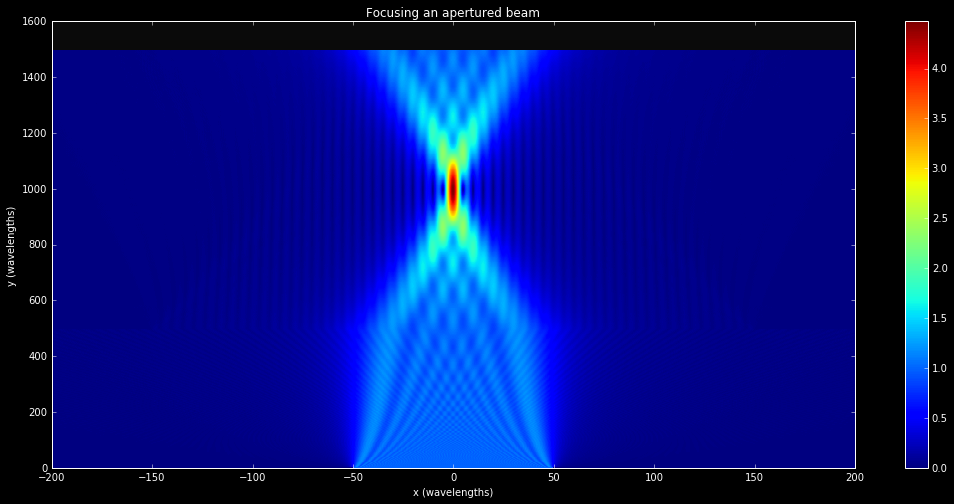

In [13]:
plt.figure(2)
doublePositions = np.concatenate((positions1, max(positions1) + positions2))
plt.pcolormesh(xpts, doublePositions, abs(allData))
plt.xlabel('x (wavelengths)')
plt.ylabel('y (wavelengths)')
plt.colorbar()
plt.title('Focusing an apertured beam')
print('spacing = ' + str(spacing))
plt.xlim(-200, 200)
plt.show()

# Problem #2

## Problem Statement

Use the same paraxial lens but let the Distance from the object to the lens and the lens to the observation plane (final z in problem) both be one focal length. Comment on the shape of the field you observe in the image plane. 

## Work

In [20]:
numberOfPoints = 2**15

# 
squareLength = 200
lensSize = 600
dataRange = 6000
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < squareLength / 2
wavelength = 1
focalLength = 20000
lensPhase = np.exp(-1j * (2*np.pi/wavelength) * focalLength * (1 + (1/2)*(xpts/focalLength)**2))
field0 = field0

positions1 = np.arange(0, 2*focalLength, 100)
positions2 = np.arange(0, 2*focalLength, 100)
allData = np.zeros((len(positions1) + len(positions2), numberOfPoints), dtype=complex)

for pos in range(len(positions1)):
    allData[pos] = propagate(field0, xpts, positions1[pos], wavelength)
    

for pos in range(len(positions2)):
    allData[len(positions1) + pos] = propagate(field0, xpts, max(positions1), wavelength)
    allData[len(positions1) + pos] = allData[len(positions1) + pos] * lensPhase * (np.abs(xpts) < lensSize / 2)
    allData[len(positions1) + pos] = propagate(allData[len(positions1) + pos], xpts, positions2[pos], wavelength)


spacing = 0.183099880985


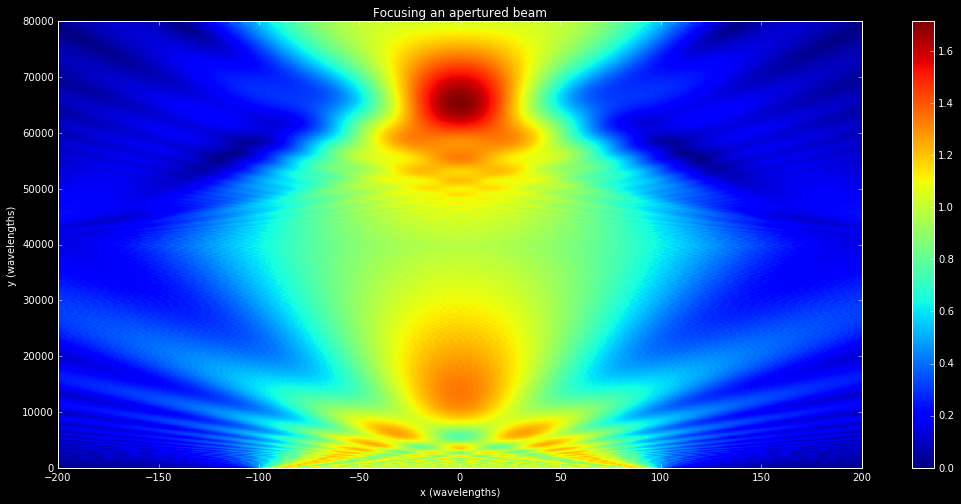

In [21]:
plt.figure(2)
doublePositions = np.concatenate((positions1, max(positions1) + positions2))
plt.pcolormesh(xpts, doublePositions, abs(allData))
plt.xlabel('x (wavelengths)')
plt.ylabel('y (wavelengths)')
plt.colorbar()
plt.title('Focusing an apertured beam')
print('spacing = ' + str(spacing))
plt.xlim(-200, 200)
plt.show()

# Problem #3

## Problem Statement

Implement a sinusoidal phase grating and validate the expected diffraction pattern from a theoretical calculation.

## Work

As discussed in Goodman's book on page 82, I define my phase grating to have an amplitude transmittance function of 
$$
t_A\{x',y'\} = \text{exp}\big\{\frac{im}{2} \text{sin}\{2\pi f_0 x'\}\big\}
$$

In [38]:
numberOfPoints = 2**16
#
squareLength = 100
dataRange = 5000
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < squareLength / 2
wavelength = 1
gratingFrequency = 0.1
gratingAmplitude = 1
phaseGratingPhase = np.exp(-1j * gratingAmplitude / 2 * np.sin(2*np.pi*gratingFrequency*xpts))
field0 = field0 * phaseGratingPhase

positions = np.arange(0, 20, 0.5)
allData = np.zeros((len(positions), numberOfPoints), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
finAngles = np.arctan(xpts/max(positions))

spacing = 0.076292781177


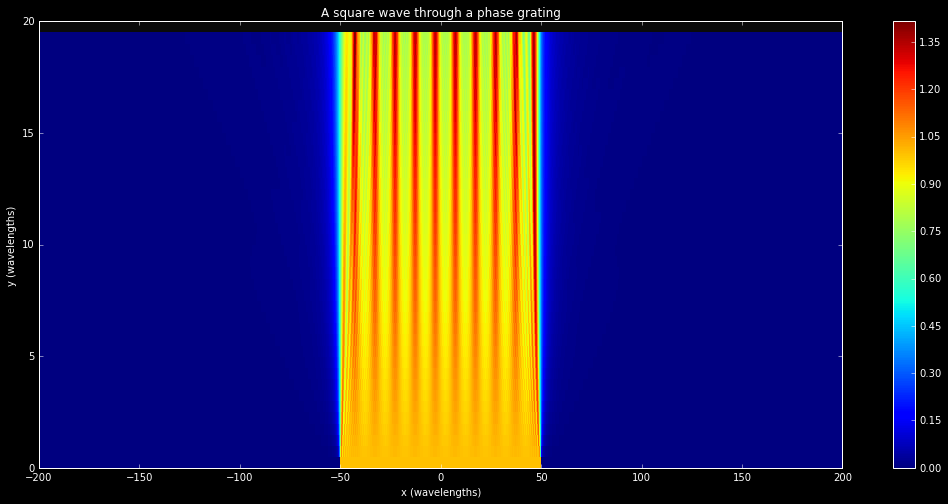

In [39]:
plt.figure(2)
plt.pcolormesh(xpts, positions, abs(allData))
plt.xlabel('x (wavelengths)')
plt.ylabel('y (wavelengths)')
plt.colorbar()
plt.title('A square wave through a phase grating')
print('spacing = ' + str(spacing))
plt.xlim(-200, 200)
plt.show()

# Problem #4

## Problem Statement

Demonstrate Talbot images as described in section 4.5.2.

## Work

In [48]:
numberOfPoints = 2**16
#
squareLength = 100
dataRange = 1000
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < squareLength / 2
wavelength = 1
gratingFrequency = 0.5
gratingAmplitude = 0.5
ampGratingPhase = 1/2 * (1 + gratingAmplitude * np.cos(2 * np.pi * xpts * gratingFrequency))
field0 = field0 * ampGratingPhase

positions = np.arange(0, 20, 0.1)
allData = np.zeros((len(positions), numberOfPoints), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
finAngles = np.arctan(xpts/max(positions))

spacing = 0.0152585562354


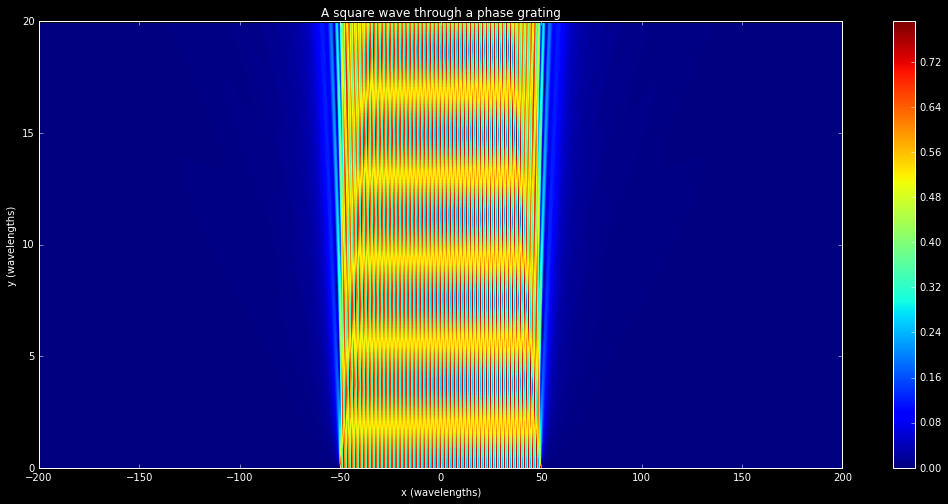

In [49]:
plt.figure(2)
plt.pcolormesh(xpts, positions, abs(allData))
plt.xlabel('x (wavelengths)')
plt.ylabel('y (wavelengths)')
plt.colorbar()
plt.title('A square wave through a phase grating')
print('spacing = ' + str(spacing))
plt.xlim(-200, 200)
plt.show()